In [72]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [73]:
# Load the dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)

In [74]:
# Inspect first few lines of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [75]:
# Check dataset structure, data types, and missing values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [76]:
# Check common descriptive statistics for numerical variables
insurance.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


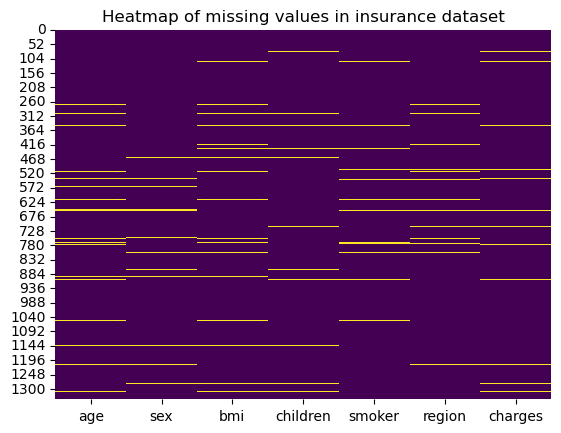

In [77]:
# Create a heatmap to visualize missing values
sns.heatmap(insurance.isna(), cbar=False, cmap="viridis")
plt.title("Heatmap of missing values in insurance dataset")
plt.show()

In [78]:
# Remove rows with missing data
insurance = insurance.dropna()

In [79]:
# Discard rows where age is negative and set children value to 0 when negative
insurance = insurance[insurance["age"] > 0]
insurance.loc[insurance["children"] < 0, "children"] = 0

In [80]:
# Streamline format in column charges by removing '$' and converting to float
insurance['charges'] = insurance['charges'].str.strip('$').astype('float')

In [81]:
# Check categories in column sex
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [82]:
# Replace values in column sex to keep only 2 categories: female and male
replacement_dict = {
    'woman':'female',
    'F': 'female',
    'man':'male',
    'M':'male'
}

insurance['sex'] = insurance['sex'].replace(replacement_dict)

In [83]:
# Check categories in column smoker
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [84]:
# Check categories in column region
insurance['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [85]:
# Streamline format in column region by converting values to lowercase
insurance['region'] = insurance['region'].str.lower()

In [86]:
# Define features and dependent variable for the model
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Define categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [87]:
# Instantiate linear regression model
linreg = LinearRegression()

# Fit the model and perform cross_validation
linreg.fit(X, y)
r2_scores = cross_val_score(linreg, X, y, cv=5, scoring='r2')
r2_score = np.mean(r2_scores)
print(r2_score)

0.7450511466263763


In [88]:
# Apply the model to estimate predicted_charges for unseen data 
validation_data = pd.read_csv('validation_dataset.csv')
validation_data_processed = pd.get_dummies(validation_data, columns=categorical_features, drop_first=True)
validation_data_processed[numerical_features] = scaler.fit_transform(validation_data_processed[numerical_features])
validation_predictions = linreg.predict(validation_data_processed)    

In [89]:
# Create column to store predictions (insurance charges) and adjust predictions to ensure minimum charge is $1000 
validation_data['predicted_charges'] = validation_predictions
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1255.405000
1,39.0,male,26.410000,0.0,yes,northeast,29588.117779
2,27.0,male,29.150000,0.0,yes,southeast,27077.976556
3,71.0,male,65.502135,13.0,yes,southeast,40306.211530
4,28.0,male,38.060000,0.0,no,southeast,4283.061597
